In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
base_path='C:\\Uni\\1M. Semester\\DocDig\\gen_img\\scan_1972_CdB_10_20231125162253.pdf\\cells\\TEST'
output_path='C:\\Uni\\1M. Semester\\DocDig\\gen_img\\scan_1972_CdB_10_20231125162253.pdf\\cells\\TEST'

In [3]:
def detectQuotationMarks(image):
    # Convert the image to grayscale if it's not already
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply edge detection (Canny algorithm)
    edges = cv2.Canny(image, 50, 150, apertureSize=3)

    # Use the Hough Line Transform to detect lines
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=30, maxLineGap=5)

    # Count the number of lines detected
    line_count = len(lines) if lines is not None else 0

    # Determine if the image contains text or just quotation marks based on the line count
    if line_count < 5:
        return {
            'Quotationmark': True,
            'lineCount': line_count
        }
    else:
        return {
            'Quotationmark': False,
            'lineCount': line_count
        }
    
def detectQuotationMarks2(image):
    # Convert the image to grayscale if it's not already
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding to create a binary image
    _, thresholded = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)
    
    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Count the number of contours found
    contour_count = len(contours)
    
    # Determine if the image contains text or just quotation marks based on the contour count
    if contour_count < 5:  # Adjust this threshold based on your requirements
        return {
            'Quotationmark': True,
            'lineCount': contour_count
        }
    else:
        return {
            'Quotationmark': False,
            'lineCount': contour_count
        }
    
def detectQuotationMarks3(image):
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds for "nearly white"
    lower_white = np.array([0, 0, 200])  # Low saturation and high value
    upper_white = np.array([180, 50, 255])           # Wide range of hue and low saturation

    # Create a mask for pixels that are considered white or nearly white
    mask = cv2.inRange(hsv, lower_white, upper_white)

    # Invert the mask to count non-white pixels
    non_white_pixels = np.sum(mask == 0)

    # Get the total number of pixels in the image
    total_pixels = hsv.shape[0] * hsv.shape[1]

    # Calculate the relative amount of non-white pixels
    relative_non_white = non_white_pixels / total_pixels

    # Determine if the image contains text or just quotation marks based on the ratio
    if relative_non_white < 0.089:
        return {
            'Quotationmark': True,
            'relativeNonWhite': relative_non_white
        }
    else:
        return {
            'Quotationmark': False,
            'relativeNonWhite': relative_non_white
        }


0-10.png
Image 0-10.png has LineCount: 7, is a Quotationmark : False
Image 0-10.png has LineCount: 80, is a Quotationmark : False
Image 0-10.png has LineCount: 0.07571217745181343, is a Quotationmark : True

0-11.png
Image 0-11.png has LineCount: 8, is a Quotationmark : False
Image 0-11.png has LineCount: 68, is a Quotationmark : False
Image 0-11.png has LineCount: 0.08526593528676572, is a Quotationmark : True

0-12.png
Image 0-12.png has LineCount: 8, is a Quotationmark : False
Image 0-12.png has LineCount: 74, is a Quotationmark : False
Image 0-12.png has LineCount: 0.09369069110771652, is a Quotationmark : False

0-14.png
Image 0-14.png has LineCount: 10, is a Quotationmark : False
Image 0-14.png has LineCount: 99, is a Quotationmark : False
Image 0-14.png has LineCount: 0.08555073565582935, is a Quotationmark : True

0-15.png
Image 0-15.png has LineCount: 8, is a Quotationmark : False
Image 0-15.png has LineCount: 98, is a Quotationmark : False
Image 0-15.png has LineCount: 0.0903

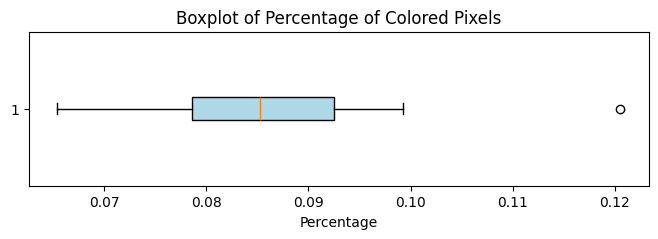

In [8]:
QuotationMarkCount = 0
TextCount = 0
QuotationMarkCount2 = 0
TextCount2 = 0
QuotationMarkCount3 = 0
TextCount3 = 0
valuesBlueNames3 = []

# True LABEL is Text
for file in os.listdir('C:\\Uni\\1M. Semester\\DocDig\\gen_img\\scan_1972_CdB_3_20231125160810.pdf\\cells\\DataSplitted\\line'):#os.path.join(base_path, "BlueNames")):
    print(file)
    # Read the image using OpenCV
    img = cv2.imread(os.path.join('C:\\Uni\\1M. Semester\\DocDig\\gen_img\\scan_1972_CdB_3_20231125160810.pdf\\cells',"DataSplitted\\line", file))#(base_path,"BlueNames", file))
    result = detectQuotationMarks(img)
    result2 = detectQuotationMarks2(img)
    result3 = detectQuotationMarks3(img)
    print(f"Image {file} has LineCount: {result['lineCount']}, is a Quotationmark : {result['Quotationmark']}")
    print(f"Image {file} has LineCount: {result2['lineCount']}, is a Quotationmark : {result2['Quotationmark']}")
    print(f"Image {file} has LineCount: {result3['relativeNonWhite']}, is a Quotationmark : {result3['Quotationmark']}\n")

    QuotationMarkCount += 1 if result['Quotationmark'] == True else 0
    TextCount += 1 if result['Quotationmark'] == False else 0
    QuotationMarkCount2 += 1 if result2['Quotationmark'] == True else 0
    TextCount2 += 1 if result2['Quotationmark'] == False else 0
    QuotationMarkCount3 += 1 if result3['Quotationmark'] == True else 0
    TextCount3 += 1 if result3['Quotationmark'] == False else 0
    valuesBlueNames3.append(result3['relativeNonWhite'])

print("\nVersion 1 Quoatation Mark Count: ", QuotationMarkCount, ", Text Count: ", TextCount)
print("Version 2 Quoatation Mark Count: ", QuotationMarkCount2, ", Text Count: ", TextCount2)
print("Version 3 Quoatation Mark Count: ", QuotationMarkCount3, ", Text Count: ", TextCount3)
print(f"Mean: {np.mean(valuesBlueNames3):.4f}, Median: {np.median(valuesBlueNames3):.4f}, Quantiles (5, 10, 15): ({np.quantile(valuesBlueNames3, 0.05):.4f}, {np.quantile(valuesBlueNames3, 0.10):.4f}, {np.quantile(valuesBlueNames3, 0.15):.4f}), Minimum: {np.min(valuesBlueNames3):.4f}, Maximum: {np.max(valuesBlueNames3):.4f}")

plt.figure(figsize=(8, 2))
plt.boxplot(valuesBlueNames3, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Add labels and title
plt.title('Boxplot of Percentage of Colored Pixels')
plt.xlabel('Percentage')

# Display the plot
plt.show()

0-13.png
Image 0-13.png has LineCount: 9, is a Quotationmark : False
Image 0-13.png has LineCount: 108, is a Quotationmark : False
Image 0-13.png has LineCount: 0.12231436110064078, is a Quotationmark : False

0-16.png
Image 0-16.png has LineCount: 8, is a Quotationmark : False
Image 0-16.png has LineCount: 111, is a Quotationmark : False
Image 0-16.png has LineCount: 0.1335462667222145, is a Quotationmark : False

0-2.png
Image 0-2.png has LineCount: 9, is a Quotationmark : False
Image 0-2.png has LineCount: 75, is a Quotationmark : False
Image 0-2.png has LineCount: 0.19693758380552792, is a Quotationmark : False

0-20.png
Image 0-20.png has LineCount: 12, is a Quotationmark : False
Image 0-20.png has LineCount: 110, is a Quotationmark : False
Image 0-20.png has LineCount: 0.11579708911396715, is a Quotationmark : False

0-22.png
Image 0-22.png has LineCount: 10, is a Quotationmark : False
Image 0-22.png has LineCount: 125, is a Quotationmark : False
Image 0-22.png has LineCount: 0.1

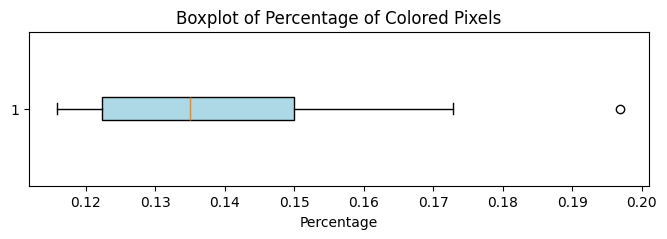

In [9]:
QuotationMarkCount = 0
TextCount = 0
QuotationMarkCount2 = 0
TextCount2 = 0
QuotationMarkCount3 = 0
TextCount3 = 0
valuesBlueNames3 = []

# True LABEL is Text
for file in os.listdir('C:\\Uni\\1M. Semester\\DocDig\\gen_img\\scan_1972_CdB_3_20231125160810.pdf\\cells\\DataSplitted\\text'):#os.path.join(base_path, "BlueNames")):
    print(file)
    # Read the image using OpenCV
    img = cv2.imread(os.path.join('C:\\Uni\\1M. Semester\\DocDig\\gen_img\\scan_1972_CdB_3_20231125160810.pdf\\cells',"DataSplitted\\text", file))#(base_path,"BlueNames", file))
    result = detectQuotationMarks(img)
    result2 = detectQuotationMarks2(img)
    result3 = detectQuotationMarks3(img)
    print(f"Image {file} has LineCount: {result['lineCount']}, is a Quotationmark : {result['Quotationmark']}")
    print(f"Image {file} has LineCount: {result2['lineCount']}, is a Quotationmark : {result2['Quotationmark']}")
    print(f"Image {file} has LineCount: {result3['relativeNonWhite']}, is a Quotationmark : {result3['Quotationmark']}\n")

    QuotationMarkCount += 1 if result['Quotationmark'] == True else 0
    TextCount += 1 if result['Quotationmark'] == False else 0
    QuotationMarkCount2 += 1 if result2['Quotationmark'] == True else 0
    TextCount2 += 1 if result2['Quotationmark'] == False else 0
    QuotationMarkCount3 += 1 if result3['Quotationmark'] == True else 0
    TextCount3 += 1 if result3['Quotationmark'] == False else 0
    valuesBlueNames3.append(result3['relativeNonWhite'])

print("\nVersion 1 Quoatation Mark Count: ", QuotationMarkCount, ", Text Count: ", TextCount)
print("Version 2 Quoatation Mark Count: ", QuotationMarkCount2, ", Text Count: ", TextCount2)
print("Version 3 Quoatation Mark Count: ", QuotationMarkCount3, ", Text Count: ", TextCount3)
print(f"Mean: {np.mean(valuesBlueNames3):.4f}, Median: {np.median(valuesBlueNames3):.4f}, Quantiles (5, 10, 15): ({np.quantile(valuesBlueNames3, 0.05):.4f}, {np.quantile(valuesBlueNames3, 0.10):.4f}, {np.quantile(valuesBlueNames3, 0.15):.4f}), Minimum: {np.min(valuesBlueNames3):.4f}, Maximum: {np.max(valuesBlueNames3):.4f}")

plt.figure(figsize=(8, 2))
plt.boxplot(valuesBlueNames3, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Add labels and title
plt.title('Boxplot of Percentage of Colored Pixels')
plt.xlabel('Percentage')

# Display the plot
plt.show()

Image 18-15.png has LineCount: 8, is a Quotationmark : False
Image 18-15.png has LineCount: 63, is a Quotationmark : False
Image 18-15.png has non white pixels: 0.06708855157764305, is a Quotationmark : True

Image 18-16.png has LineCount: 8, is a Quotationmark : False
Image 18-16.png has LineCount: 51, is a Quotationmark : False
Image 18-16.png has non white pixels: 0.06546064901156284, is a Quotationmark : True

Image 18-17.png has LineCount: 10, is a Quotationmark : False
Image 18-17.png has LineCount: 71, is a Quotationmark : False
Image 18-17.png has non white pixels: 0.07008812010443864, is a Quotationmark : True

Image 18-18.png has LineCount: 9, is a Quotationmark : False
Image 18-18.png has LineCount: 92, is a Quotationmark : False
Image 18-18.png has non white pixels: 0.06499440507273406, is a Quotationmark : True

Image 18-20.png has LineCount: 9, is a Quotationmark : False
Image 18-20.png has LineCount: 84, is a Quotationmark : False
Image 18-20.png has non white pixels: 0.

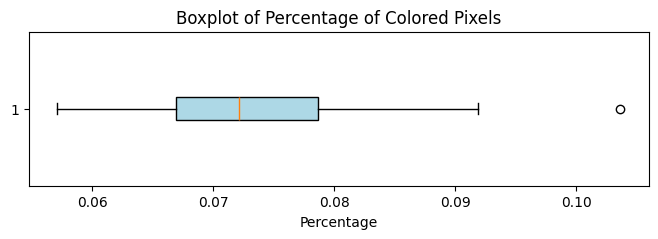

In [55]:
QuotationMarkCount = 0
TextCount = 0
QuotationMarkCount2 = 0
TextCount2 = 0
QuotationMarkCount3 = 0
TextCount3 = 0
valuesBlueLines3 = []

# True LABEL is Quotationmark
for file in os.listdir(os.path.join(base_path, "BlueLines")):
    # Read the image using OpenCV
    img = cv2.imread(os.path.join(base_path, "BlueLines", file))
    result = detectQuotationMarks(img)
    result2 = detectQuotationMarks2(img)
    result3 = detectQuotationMarks3(img)
    print(f"Image {file} has LineCount: {result['lineCount']}, is a Quotationmark : {result['Quotationmark']}")
    print(f"Image {file} has LineCount: {result2['lineCount']}, is a Quotationmark : {result2['Quotationmark']}")
    print(f"Image {file} has non white pixels: {result3['relativeNonWhite']}, is a Quotationmark : {result3['Quotationmark']}\n")

    QuotationMarkCount += 1 if result['Quotationmark'] == True else 0
    TextCount += 1 if result['Quotationmark'] == False else 0
    QuotationMarkCount2 += 1 if result2['Quotationmark'] == True else 0
    TextCount2 += 1 if result2['Quotationmark'] == False else 0
    QuotationMarkCount3 += 1 if result3['Quotationmark'] == True else 0
    TextCount3 += 1 if result3['Quotationmark'] == False else 0
    valuesBlueLines3.append(result3['relativeNonWhite'])

print("\nVersion 1 Quoatation Mark Count: ", QuotationMarkCount, ", Text Count: ", TextCount)
print("Version 2 Quoatation Mark Count: ", QuotationMarkCount2, ", Text Count: ", TextCount2)
print("Version 3 Quoatation Mark Count: ", QuotationMarkCount3, ", Text Count: ", TextCount3)
print(f"Mean: {np.mean(valuesBlueLines3):.4f}, Median: {np.median(valuesBlueLines3):.4f}, Quantiles (85, 90, 95): ({np.quantile(valuesBlueLines3, 0.85):.4f}, {np.quantile(valuesBlueLines3, 0.90):.4f}, {np.quantile(valuesBlueLines3, 0.95):.4f}), Minimum: {np.min(valuesBlueLines3):.4f}, Maximum: {np.max(valuesBlueLines3):.4f}")

plt.figure(figsize=(8, 2))
plt.boxplot(valuesBlueLines3, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Add labels and title
plt.title('Boxplot of Percentage of Colored Pixels')
plt.xlabel('Percentage')

# Display the plot
plt.show()

Image 15-29.png has LineCount: 10, is a Quotationmark : False
Image 15-29.png has LineCount: 106, is a Quotationmark : False
Image 15-29.png has non white pixels: 0.12645161290322582, is a Quotationmark : False

Image 15-32.png has LineCount: 17, is a Quotationmark : False
Image 15-32.png has LineCount: 109, is a Quotationmark : False
Image 15-32.png has non white pixels: 0.20584795321637428, is a Quotationmark : False

Image 15-33.png has LineCount: 21, is a Quotationmark : False
Image 15-33.png has LineCount: 79, is a Quotationmark : False
Image 15-33.png has non white pixels: 0.2860888888888889, is a Quotationmark : False

Image 15-34.png has LineCount: 14, is a Quotationmark : False
Image 15-34.png has LineCount: 96, is a Quotationmark : False
Image 15-34.png has non white pixels: 0.16856830601092895, is a Quotationmark : False

Image 15-35.png has LineCount: 9, is a Quotationmark : False
Image 15-35.png has LineCount: 56, is a Quotationmark : False
Image 15-35.png has non white pi

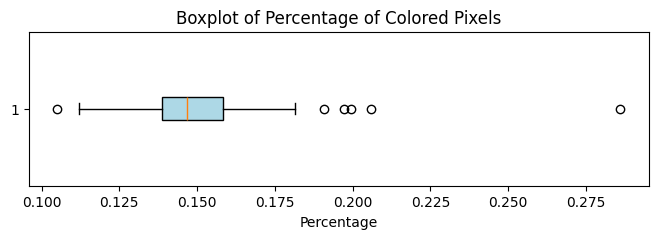

In [56]:
QuotationMarkCount = 0
TextCount = 0
QuotationMarkCount2 = 0
TextCount2 = 0
QuotationMarkCount3 = 0
TextCount3 = 0
valuesBlackNames3 = []

# True LABEL is Text
for file in os.listdir(os.path.join(base_path, "BlackNames")):
    # Read the image using OpenCV
    img = cv2.imread(os.path.join(base_path, "BlackNames", file))
    result = detectQuotationMarks(img)
    result2 = detectQuotationMarks2(img)
    result3 = detectQuotationMarks3(img)
    print(f"Image {file} has LineCount: {result['lineCount']}, is a Quotationmark : {result['Quotationmark']}")
    print(f"Image {file} has LineCount: {result2['lineCount']}, is a Quotationmark : {result2['Quotationmark']}")
    print(f"Image {file} has non white pixels: {result3['relativeNonWhite']}, is a Quotationmark : {result3['Quotationmark']}\n")

    QuotationMarkCount += 1 if result['Quotationmark'] == True else 0
    TextCount += 1 if result['Quotationmark'] == False else 0
    QuotationMarkCount2 += 1 if result2['Quotationmark'] == True else 0
    TextCount2 += 1 if result2['Quotationmark'] == False else 0
    QuotationMarkCount3 += 1 if result3['Quotationmark'] == True else 0
    TextCount3 += 1 if result3['Quotationmark'] == False else 0
    valuesBlackNames3.append(result3['relativeNonWhite'])

print("\nVersion 1 Quoatation Mark Count: ", QuotationMarkCount, ", Text Count: ", TextCount)
print("Version 2 Quoatation Mark Count: ", QuotationMarkCount2, ", Text Count: ", TextCount2)
print("Version 3 Quoatation Mark Count: ", QuotationMarkCount3, ", Text Count: ", TextCount3)
print(f"Mean: {np.mean(valuesBlackNames3):.4f}, Median: {np.median(valuesBlackNames3):.4f}, Quantiles (85, 90, 95): ({np.quantile(valuesBlackNames3, 0.85):.4f}, {np.quantile(valuesBlackNames3, 0.90):.4f}, {np.quantile(valuesBlackNames3, 0.95):.4f}), Minimum: {np.min(valuesBlackNames3):.4f}, Maximum: {np.max(valuesBlackNames3):.4f}")

plt.figure(figsize=(8, 2))
plt.boxplot(valuesBlackNames3, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Add labels and title
plt.title('Boxplot of Percentage of Colored Pixels')
plt.xlabel('Percentage')

# Display the plot
plt.show()

Image 15-31.png has LineCount: 8, is a Quotationmark : False
Image 15-31.png has LineCount: 93, is a Quotationmark : False
Image 15-31.png has non white pixels: 0.08252631578947368, is a Quotationmark : True

Image 16-19.png has LineCount: 9, is a Quotationmark : False
Image 16-19.png has LineCount: 108, is a Quotationmark : False
Image 16-19.png has non white pixels: 0.07859840168613332, is a Quotationmark : True

Image 16-21.png has LineCount: 11, is a Quotationmark : False
Image 16-21.png has LineCount: 108, is a Quotationmark : False
Image 16-21.png has non white pixels: 0.08588082901554404, is a Quotationmark : True

Image 16-23.png has LineCount: 9, is a Quotationmark : False
Image 16-23.png has LineCount: 83, is a Quotationmark : False
Image 16-23.png has non white pixels: 0.09144623216071267, is a Quotationmark : False

Image 16-24.png has LineCount: 12, is a Quotationmark : False
Image 16-24.png has LineCount: 75, is a Quotationmark : False
Image 16-24.png has non white pixels

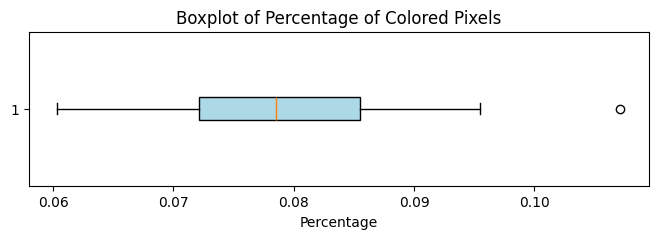

In [57]:
QuotationMarkCount = 0
TextCount = 0
QuotationMarkCount2 = 0
TextCount2 = 0
QuotationMarkCount3 = 0
TextCount3 = 0
valuesBlackLines3 = []

# True LABEL is Quotationmark
for file in os.listdir(os.path.join(base_path, "BlackLines")):
    # Read the image using OpenCV
    img = cv2.imread(os.path.join(base_path, "BlackLines", file))
    result = detectQuotationMarks(img)
    result2 = detectQuotationMarks2(img)
    result3 = detectQuotationMarks3(img)
    print(f"Image {file} has LineCount: {result['lineCount']}, is a Quotationmark : {result['Quotationmark']}")
    print(f"Image {file} has LineCount: {result2['lineCount']}, is a Quotationmark : {result2['Quotationmark']}")
    print(f"Image {file} has non white pixels: {result3['relativeNonWhite']}, is a Quotationmark : {result3['Quotationmark']}\n")

    QuotationMarkCount += 1 if result['Quotationmark'] == True else 0
    TextCount += 1 if result['Quotationmark'] == False else 0
    QuotationMarkCount2 += 1 if result2['Quotationmark'] == True else 0
    TextCount2 += 1 if result2['Quotationmark'] == False else 0
    QuotationMarkCount3 += 1 if result3['Quotationmark'] == True else 0
    TextCount3 += 1 if result3['Quotationmark'] == False else 0
    valuesBlackLines3.append(result3['relativeNonWhite'])

print("\nVersion 1 Quoatation Mark Count: ", QuotationMarkCount, ", Text Count: ", TextCount)
print("Version 2 Quoatation Mark Count: ", QuotationMarkCount2, ", Text Count: ", TextCount2)
print("Version 3 Quoatation Mark Count: ", QuotationMarkCount3, ", Text Count: ", TextCount3)
print(f"Mean: {np.mean(valuesBlackLines3):.4f}, Median: {np.median(valuesBlackLines3):.4f}, Quantiles (85, 90, 95): ({np.quantile(valuesBlackLines3, 0.85):.4f}, {np.quantile(valuesBlackLines3, 0.90):.4f}, {np.quantile(valuesBlackLines3, 0.95):.4f}), Minimum: {np.min(valuesBlackLines3):.4f}, Maximum: {np.max(valuesBlackLines3):.4f}")

plt.figure(figsize=(8, 2))
plt.boxplot(valuesBlackLines3, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Add labels and title
plt.title('Boxplot of Percentage of Colored Pixels')
plt.xlabel('Percentage')

# Display the plot
plt.show()


RESULTS FOR BLUENAMES:
Mean: 0.1310, Median: 0.1264, Quantiles (5, 10, 15): (0.1012, 0.1070, 0.1098), Minimum: 0.0899, Maximum: 0.2853

RESULTS FOR BLUELINES:
Mean: 0.0735, Median: 0.0721, Quantiles (85, 90, 95): (0.0822, 0.0844, 0.0905), Minimum: 0.0571, Maximum: 0.1036

RESULTS FOR BLACKNAMES:
Mean: 0.1524, Median: 0.1467, Quantiles (85, 90, 95): (0.1683, 0.1861, 0.1989), Minimum: 0.1049, Maximum: 0.2861

RESULTS FOR BLACKLINES:
Mean: 0.0793, Median: 0.0785, Quantiles (85, 90, 95): (0.0884, 0.0903, 0.0929), Minimum: 0.0603, Maximum: 0.1071


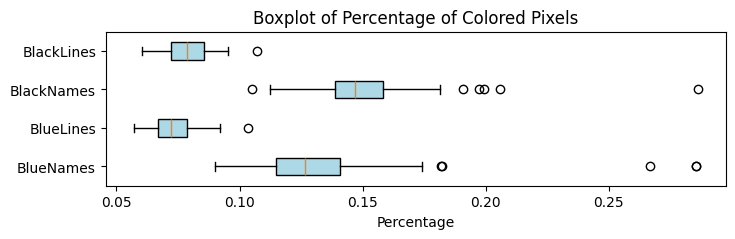

In [52]:
# Final Results for Comparison

# BlueNames
print("\nRESULTS FOR BLUENAMES:")
print(f"Mean: {np.mean(valuesBlueNames3):.4f}, Median: {np.median(valuesBlueNames3):.4f}, Quantiles (5, 10, 15): ({np.quantile(valuesBlueNames3, 0.05):.4f}, {np.quantile(valuesBlueNames3, 0.10):.4f}, {np.quantile(valuesBlueNames3, 0.15):.4f}), Minimum: {np.min(valuesBlueNames3):.4f}, Maximum: {np.max(valuesBlueNames3):.4f}")

print("\nRESULTS FOR BLUELINES:")
print(f"Mean: {np.mean(valuesBlueLines3):.4f}, Median: {np.median(valuesBlueLines3):.4f}, Quantiles (85, 90, 95): ({np.quantile(valuesBlueLines3, 0.85):.4f}, {np.quantile(valuesBlueLines3, 0.90):.4f}, {np.quantile(valuesBlueLines3, 0.95):.4f}), Minimum: {np.min(valuesBlueLines3):.4f}, Maximum: {np.max(valuesBlueLines3):.4f}")

print("\nRESULTS FOR BLACKNAMES:")
print(f"Mean: {np.mean(valuesBlackNames3):.4f}, Median: {np.median(valuesBlackNames3):.4f}, Quantiles (85, 90, 95): ({np.quantile(valuesBlackNames3, 0.85):.4f}, {np.quantile(valuesBlackNames3, 0.90):.4f}, {np.quantile(valuesBlackNames3, 0.95):.4f}), Minimum: {np.min(valuesBlackNames3):.4f}, Maximum: {np.max(valuesBlackNames3):.4f}")

print("\nRESULTS FOR BLACKLINES:")
print(f"Mean: {np.mean(valuesBlackLines3):.4f}, Median: {np.median(valuesBlackLines3):.4f}, Quantiles (85, 90, 95): ({np.quantile(valuesBlackLines3, 0.85):.4f}, {np.quantile(valuesBlackLines3, 0.90):.4f}, {np.quantile(valuesBlackLines3, 0.95):.4f}), Minimum: {np.min(valuesBlackLines3):.4f}, Maximum: {np.max(valuesBlackLines3):.4f}")


plt.figure(figsize=(8, 2))
plt.boxplot([valuesBlueNames3, valuesBlueLines3, valuesBlackNames3, valuesBlackLines3], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Add labels and title
plt.title('Boxplot of Percentage of Colored Pixels')
plt.xlabel('Percentage')
plt.yticks([1, 2, 3, 4], ['BlueNames', 'BlueLines', 'BlackNames', 'BlackLines'])

# Display the plot
plt.show()